## Customer Segmentation Analysis with Python

Customer segmentation is useful in understanding what demographic and psychographic sub-populations there are within your customers in a business case.
By understanding this, you can better understand how to market and serve them. 

Import libraries and Data

In [20]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Next we use describe() function on data to see the descriptive statistics for each variable.

In [2]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From calling describe, we can see that there are no values to clean. Age looks pretty normally distributed, annual income doesn’t have outliers that are too excessive. Spending score is in fact between 1 and 100.

### Exploring the Data
It’s always informative to see how categorical variables are split up throughout the data set. This can be done with a simple count plot like so:

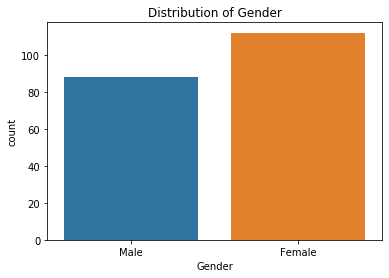

In [3]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=customers);
plt.title('Distribution of Gender');

There are slightly more women than men in this data set. They will perhaps be a significant element in your customer segmentation efforts later.


What about age?

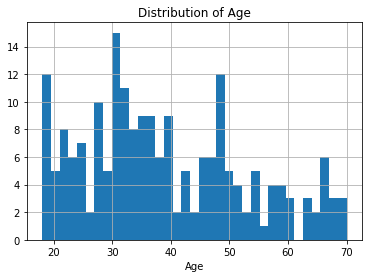

In [4]:
# Create a histogram of ages
customers.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

The ages are mostly between 30 and 40. Recalling the describe() call results this makes sense. The average age was 38. There are less older customers, so this distribution is right-skewed because of its longer right tail. This could be because of the appeal of malls and the type of demographic that tends to shop there.
You can add detail to this by overlaying two histograms, creating one age histogram for each gender.

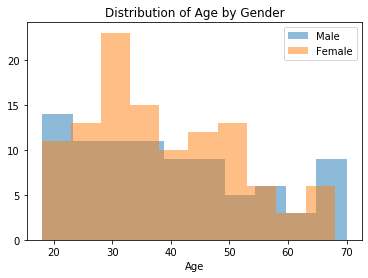

In [5]:
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

The men in this data set tended to be younger than the women. You can see the spike around the age of 30–35 for the women is where the majority of them fall. There are also more middle-aged women in this data set than men. There is a significant amount of senior men in the 65–70 year old bucket.


How about income? 

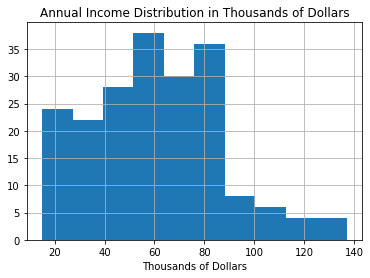

In [22]:
customers.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

Much of the incomes lie between the 60 and 85,000 dollar buckets. 

Does gender impact this?


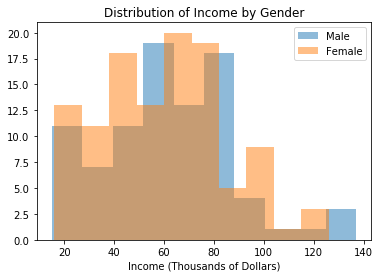

In [7]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

The women in this data set make less money than the men. What does their spending score look like and how does it compare though?

In [8]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


Men had an average spending score of 48.5 and women had an average score of 51.5. Women earned less but spent more at this mall and in this data set.
You can add further complexity to understand the data even further. Because there are mostly quantitative variables and one clean, binary categorical variable, it’s helpful to make some scatter plots.

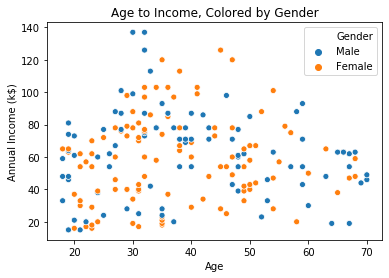

In [9]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=customers);
plt.title('Age to Income, Colored by Gender');

There is no clear correlation. In fact, you can quantify this and make sure and do it on all variables very easily. Just call sns.heatmap(customers.corr(), annot=True).


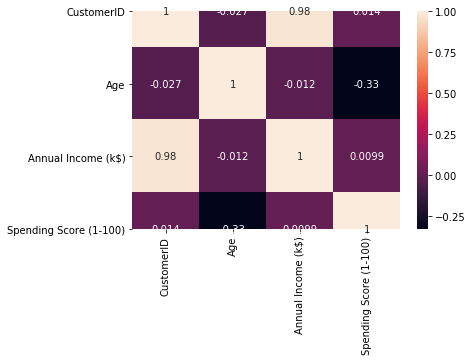

In [11]:
sns.heatmap(customers.corr(), annot=True)

You can see from the above plot that the only variables that are even somewhat correlated is spending score and age. It’s a negative correlation so the older a customer is in this data set, the lower their spending score. But because it’s 0.33, it’s not a strong correlation at all. It’s still ever so slightly informative and follows basic logic.
Coding the following plot shows that trend.

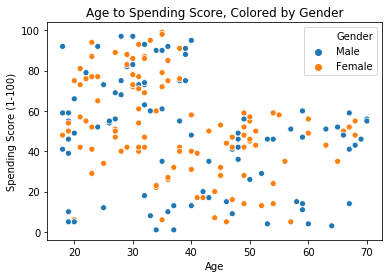

In [12]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Age to Spending Score, Colored by Gender');

You can now see that slight negative correlation. Don’t you wonder if there is a stronger correlation for men or women though? You can check that out with two heat maps on the gender-specific data frames created earlier.

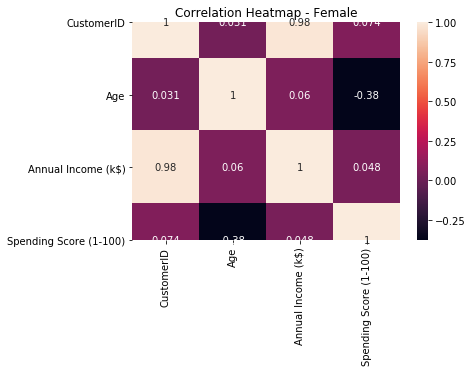

In [13]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

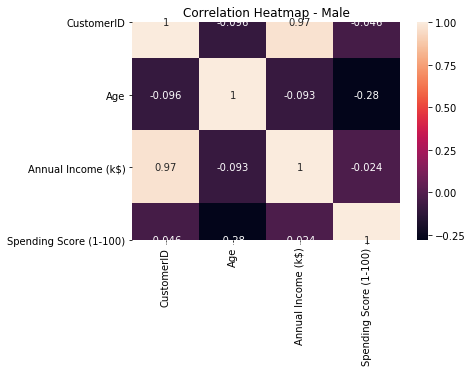

In [15]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Male');

Age more strongly affects spending score for women in this case. Nothing else is really strongly correlated enough to say much of anything.
We can zoom in on the women’s spending score to age relationship with a lmplot.

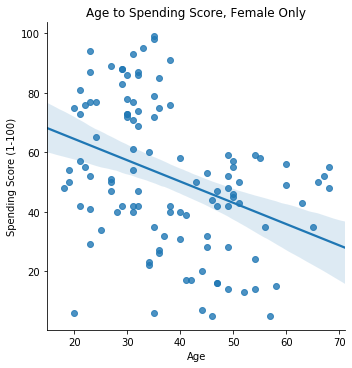

In [17]:
sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers);
plt.title('Age to Spending Score, Female Only');

Lastly, we look at income to spending score colored by gender.

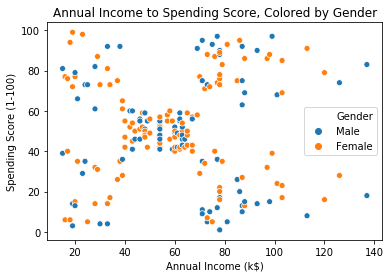

In [18]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Annual Income to Spending Score, Colored by Gender');

There is some patterning here. Zero correlation though. But you can think of these as customer segments:
    
1.Low income, low spending score

2.Low income, high spending score

3.Mid income, medium spending score

4.High income, low spending score

5.High income, high spending score

### KPIs

The change in frequency and volume of purchases by women after the introduction of more marketing campaigns targeting them.

The change in spending score after introducing marketing campaigns targeting younger women

The change in spending score after introducing marketing campaigns targeting older women.